# Bike Sharing Assignment
### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Creating DataFrame of Bike sharing day set
df_bike = pd.read_csv('day.csv')

In [4]:
# Checkoing the head of dataset
df_bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the day dataframe

In [5]:
df_bike.shape

(730, 16)

In [6]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Lets check for any null values present in Dataset
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Insights: As we can see none of null values present in dataset

In [8]:
# Using Data Charaterisitc and above analysis,
# Dropping Coloumns 'instant' : Just because it is an index, 'dteday': We have 'year', 'month' columns so need of that,
# Dropping Coloumns 'casual' & 'registered' : The values in cnt coloumns are the sum of values in 'casual' & 'registered'
df_bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)


In [9]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Observation: we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

In [10]:
# Using EDA and Data Dictionary converting coloumns season, mnth, weekday and weathersit into categorical varable from numeric variable respectively

df_bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)

df_bike.weathersit.replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

df_bike.weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [11]:
# DataSet after EDA, with coloumns having Numeric as well as Categorical Vairables
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df_bike.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 2: Visualising the Data

Now going to understand the data by plotting for that We'll visualise our data using matplotlib and seaborn .

If there is some obvious multicollinearity going on, this is the first place to find it
Here we will also identify if some predictors directly have a strong association with the outcome variable


In [13]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1440x1080 with 0 Axes>

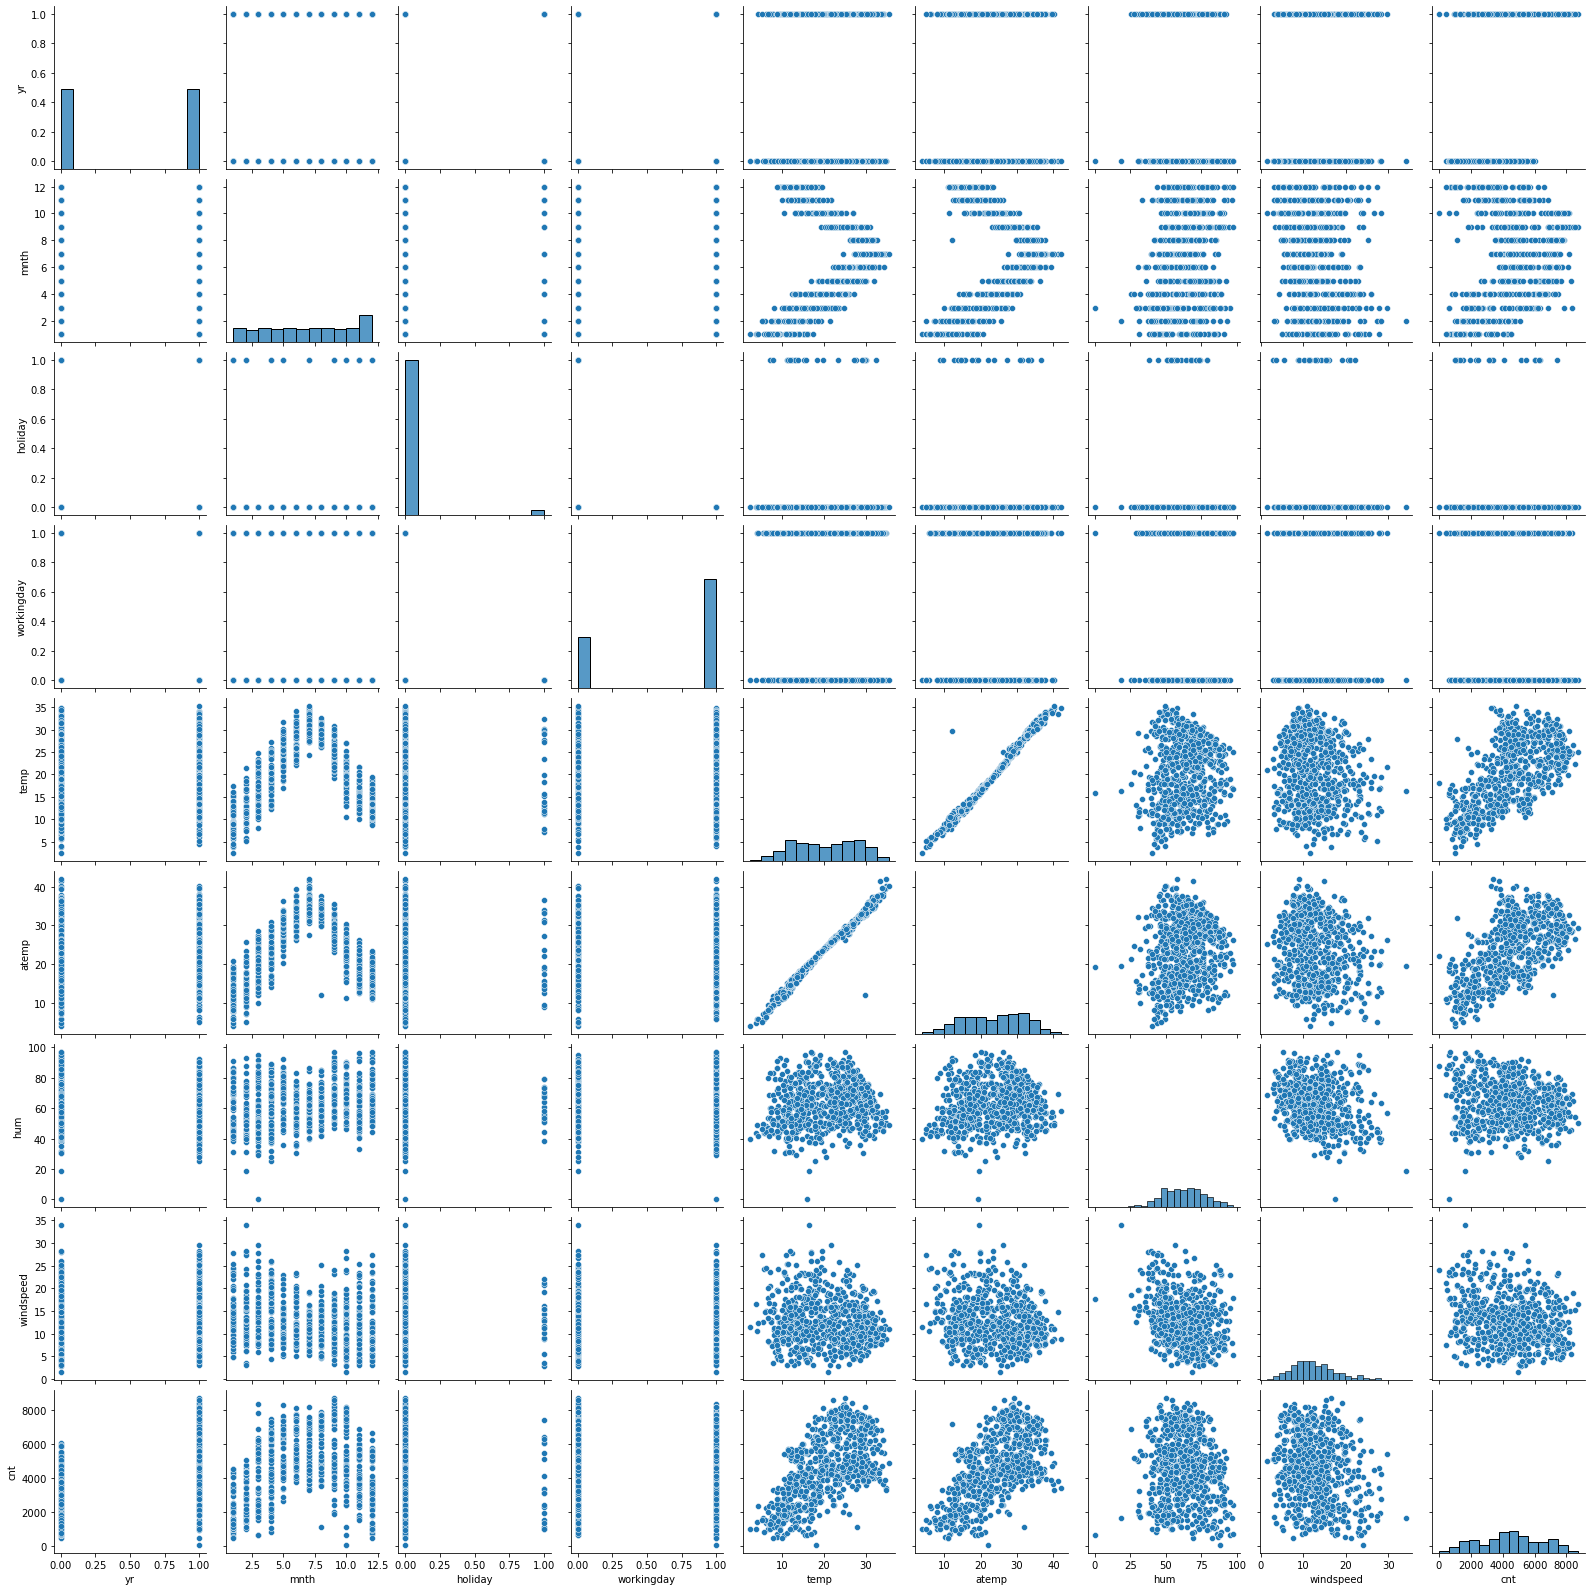

In [14]:
plt.figure(figsize=(20,15))
sns.pairplot(df_bike)
plt.show()

Observations: Here above pairplot shows similarity in between temp and atemp, for that plotting heatmap for
checking correlation

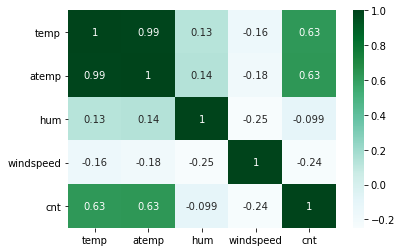

In [15]:
# Checking continuous variables relationship with each other
sns.heatmap(df_bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Observation: Above heatmap shows that temp and atemp has correlation more than .99 means almost 1 (highly correlated)


Visualising Categorical Variables

As we might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

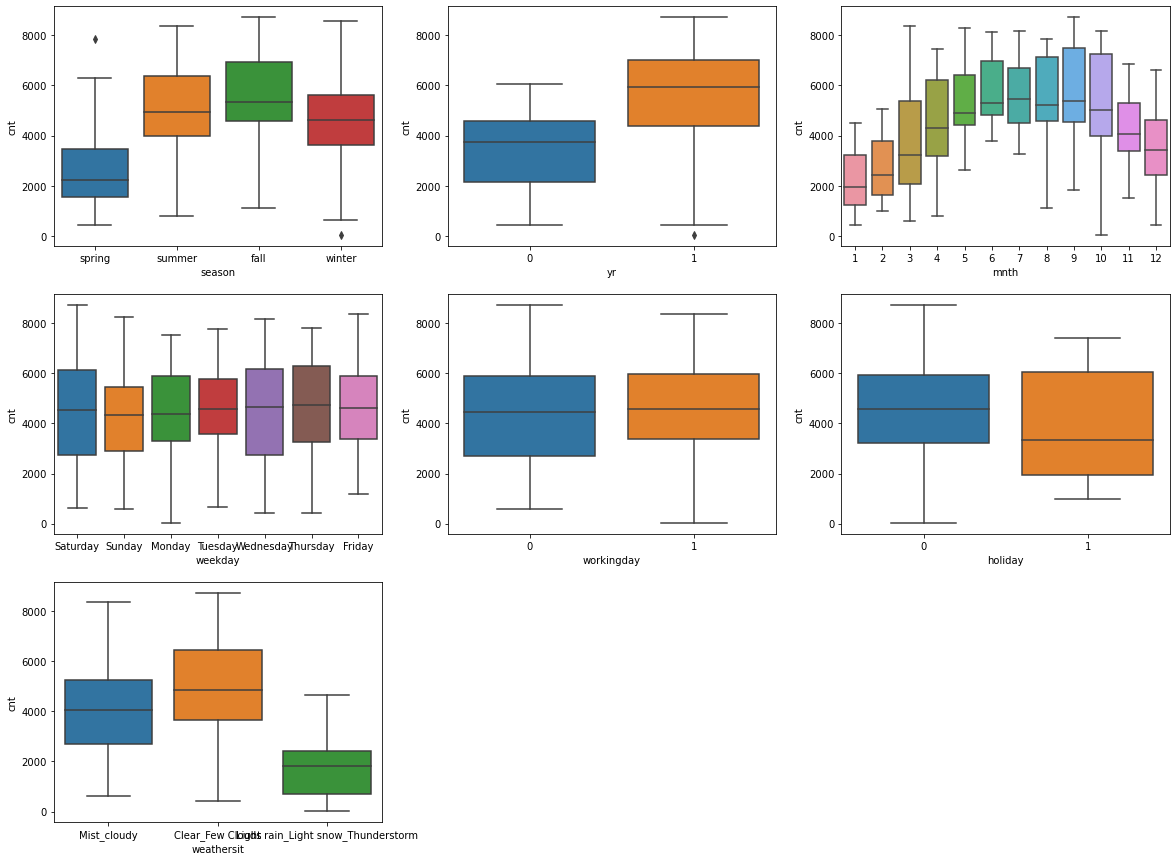

In [16]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike) 
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.show()


Plotting heat map after calculating correlation with target varaible "cnt"

In [17]:
#Calculate Correlation
corr = df_bike.corr()
corr

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


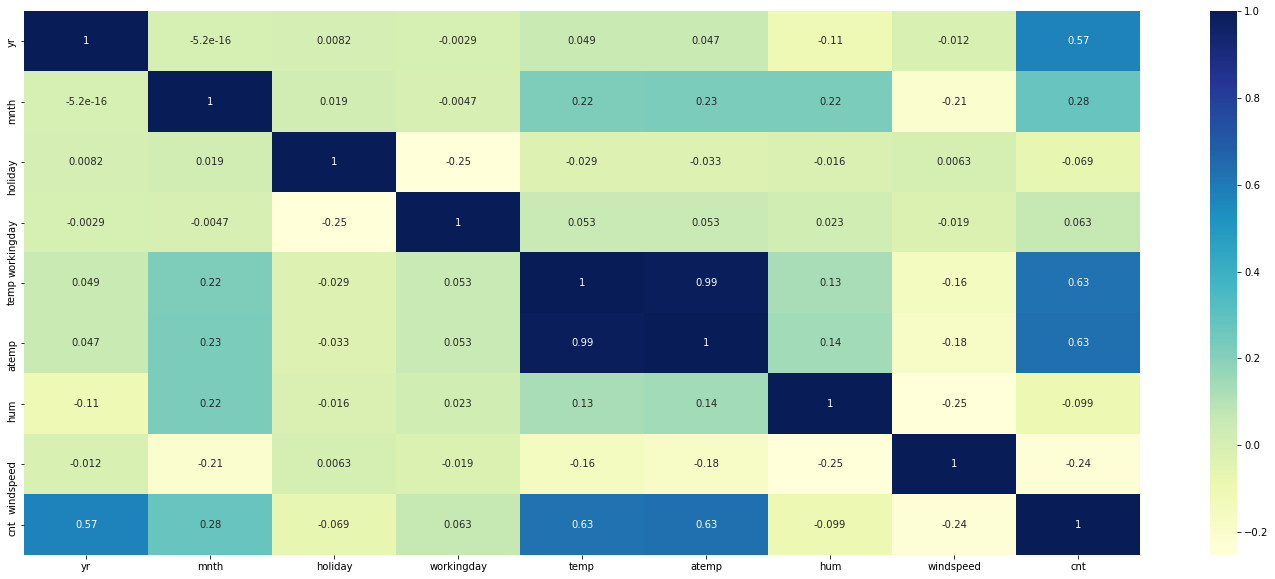

In [18]:
#Draw Heatmap of correlation
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

Observations: From the correlation "map", "temp", "atemp" and "yr" seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

#  Step 3: Data Preparation

Create dummy variables for all categorical variables

In [19]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [20]:
# convert categorical variable into dummy/indicator variables 
SeasonCondition=pd.get_dummies(df_bike['season'],drop_first=True)
WeatherCondition=pd.get_dummies(df_bike['weathersit'],drop_first=True)
DayOfWeek=pd.get_dummies(df_bike['weekday'],drop_first=True)
MonthName=pd.get_dummies(df_bike['mnth'],drop_first=True)

In [21]:
# Adding the results to the original df_bike dataframe

df_bike = pd.concat([df_bike,SeasonCondition ], axis = 1)
df_bike = pd.concat([df_bike,WeatherCondition ], axis = 1)
df_bike = pd.concat([df_bike,DayOfWeek ], axis = 1)
df_bike = pd.concat([df_bike,MonthName ], axis = 1)

In [22]:
# Now let's see the head of our dataframe.

df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Dropping the older variable season, weathersit,weekday,mnth
df_bike.drop(['season'],axis=1,inplace=True)

df_bike.drop(['weathersit'],axis=1,inplace=True)

df_bike.drop(['weekday'],axis=1,inplace=True)

df_bike.drop(['mnth'],axis=1,inplace=True)

df_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets
As we know, the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

We will use MinMax scaling.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# Applying scaler() to the columns numerical variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,0


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,7.431169,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building our model
we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', False, 13),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 14),
 ('Tuesday', False, 12),
 ('Wednesday', False, 15),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 8),
 (12, False, 9)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['workingday',       'temp',     'summer',     'Monday',   'Saturday',
           'Sunday',   'Thursday',    'Tuesday',  'Wednesday',            2,
                  7,           10,           11,           12],
      dtype='object')

### Building model using statsmodel, for the detailed statistics¶

### Model1

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe1).fit() 

#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          8.06e-186
Time:                        22:59:46   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2995      0.034      8.909      0.000       0.233       0.366
yr                                     0.2320      0.008     28.268      0.000       0.216       0.248
holiday                               -0.0845      0.026     -3.266      0.001      -0.135      -0.034
atemp                                  0.4597      0.033     13.757      0.000       0.394       0.525
hum                                   -0.1599      0.038     -4.156      0.000      -0.236      -0.084
windspeed                             -0.1613      0.026     -6.170      0.000      -0.213      -0.110
spring                                -0.0757      0.019     -4.061      0.000      -0.112      -0.039
winter                                 0.1024      0.016      6.301      0.000       0.070       0.134
Light rain_Light snow_Thunderstorm    -0.2359      0.027     -8.833      0.000      -0.288      -0.183
Mist_cloudy                           -0.0568      0.011     -5.347      0.000      -0.078      -0.036
3                                      0.0585      0.015      3.852      0.000       0.029       0.088
4                                      0.0591      0.020      2.948      0.003       0.020       0.099
5                                      0.0922      0.019      4.906      0.000       0.055       0.129
6                                      0.0583      0.019      3.017      0.003       0.020       0.096
8                                      0.0608      0.018      3.362      0.001       0.025       0.096
9                                      0.1175      0.017      6.719      0.000       0.083       0.152
==============================================================================
Omnibus:                       60.719   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.007
Skew:                          -0.591   Prob(JB):                     6.62e-36
Kurtosis:                       5.496   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
  # Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


### Model2

In [37]:
# dropping variable "hum" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

X_train_rfe2 = sm.add_constant(X_train_rfe)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.75e-183
Time:                        22:59:47   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2151      0.027      7.900      0.000       0.162       0.269
yr                                     0.2355      0.008     28.377      0.000       0.219       0.252
holiday                               -0.0854      0.026     -3.248      0.001      -0.137      -0.034
atemp                                  0.4298      0.033     12.960      0.000       0.365       0.495
windspeed                             -0.1332      0.026     -5.189      0.000      -0.184      -0.083
spring                                -0.0815      0.019     -4.310      0.000      -0.119      -0.044
winter                                 0.0911      0.016      5.597      0.000       0.059       0.123
Light rain_Light snow_Thunderstorm    -0.2799      0.025    -11.234      0.000      -0.329      -0.231
Mist_cloudy                           -0.0820      0.009     -9.252      0.000      -0.099      -0.065
3                                      0.0597      0.015      3.871      0.000       0.029       0.090
4                                      0.0597      0.020      2.930      0.004       0.020       0.100
5                                      0.0817      0.019      4.316      0.000       0.045       0.119
6                                      0.0628      0.020      3.199      0.001       0.024       0.101
8                                      0.0594      0.018      3.235      0.001       0.023       0.096
9                                      0.1118      0.018      6.311      0.000       0.077       0.147
==============================================================================
Omnibus:                       61.552   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.196
Skew:                          -0.618   Prob(JB):                     1.99e-34
Kurtosis:                       5.404   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Re evaluating VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


### Model3

In [39]:
# dropping variable "atemp" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

X_train_rfe3 = sm.add_constant(X_train_rfe)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.90e-153
Time:                        22:59:47   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5082      0.018     28.983      0.000       0.474       0.543
yr                                     0.2479      0.010     26.013      0.000       0.229       0.267
holiday                               -0.0886      0.030     -2.916      0.004      -0.148      -0.029
windspeed                             -0.1645      0.030     -5.566      0.000      -0.223      -0.106
spring                                -0.2392      0.017    -14.308      0.000      -0.272      -0.206
winter                                -0.0080      0.017     -0.482      0.630      -0.041       0.025
Light rain_Light snow_Thunderstorm    -0.2896      0.029    -10.056      0.000      -0.346      -0.233
Mist_cloudy                           -0.0943      0.010     -9.257      0.000      -0.114      -0.074
3                                      0.0494      0.018      2.772      0.006       0.014       0.084
4                                     -0.0153      0.023     -0.676      0.499      -0.060       0.029
5                                      0.0671      0.022      3.072      0.002       0.024       0.110
6                                      0.0901      0.023      3.995      0.000       0.046       0.134
8                                      0.0929      0.021      4.418      0.000       0.052       0.134
9                                      0.1318      0.020      6.456      0.000       0.092       0.172
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.924
Skew:                          -0.372   Prob(JB):                     7.28e-18
Kurtosis:                       4.777   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Re evaluating VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


### Model4

In [41]:
# dropping variable "windspeed" due to very high vif, dropping vif >2 and re-process the model
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

X_train_rfe4 = sm.add_constant(X_train_rfe)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          9.96e-148
Time:                        22:59:47   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4616      0.016     29.102      0.000       0.430       0.493
yr                                     0.2478      0.010     25.245      0.000       0.228       0.267
holiday                               -0.0918      0.031     -2.935      0.003      -0.153      -0.030
spring                                -0.2516      0.017    -14.740      0.000      -0.285      -0.218
winter                                -0.0093      0.017     -0.544      0.587      -0.043       0.024
Light rain_Light snow_Thunderstorm    -0.3052      0.030    -10.342      0.000      -0.363      -0.247
Mist_cloudy                           -0.0934      0.010     -8.907      0.000      -0.114      -0.073
3                                      0.0395      0.018      2.166      0.031       0.004       0.075
4                                     -0.0386      0.023     -1.691      0.092      -0.084       0.006
5                                      0.0638      0.022      2.838      0.005       0.020       0.108
6                                      0.0874      0.023      3.763      0.000       0.042       0.133
8                                      0.0961      0.022      4.439      0.000       0.054       0.139
9                                      0.1381      0.021      6.580      0.000       0.097       0.179
==============================================================================
Omnibus:                       43.939   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.742
Skew:                          -0.401   Prob(JB):                     3.67e-27
Kurtosis:                       5.255   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Re evaluating VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
5,Mist_cloudy,1.53
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


### Model5

In [43]:
# dropping variable "winter" due to very high p-value and re-process the model
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

X_train_rfe5 = sm.add_constant(X_train_rfe)

lm5 = sm.OLS(y_train,X_train_rfe5).fit()

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          9.28e-149
Time:                        22:59:48   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4552      0.011     42.608      0.000       0.434       0.476
yr                                     0.2478      0.010     25.263      0.000       0.228       0.267
holiday                               -0.0924      0.031     -2.956      0.003      -0.154      -0.031
spring                                -0.2457      0.013    -18.510      0.000      -0.272      -0.220
Light rain_Light snow_Thunderstorm    -0.3060      0.029    -10.389      0.000      -0.364      -0.248
Mist_cloudy                           -0.0938      0.010     -8.976      0.000      -0.114      -0.073
3                                      0.0423      0.017      2.421      0.016       0.008       0.077
4                                     -0.0321      0.019     -1.653      0.099      -0.070       0.006
5                                      0.0704      0.019      3.711      0.000       0.033       0.108
6                                      0.0938      0.020      4.703      0.000       0.055       0.133
8                                      0.1026      0.018      5.698      0.000       0.067       0.138
9                                      0.1426      0.019      7.422      0.000       0.105       0.180
==============================================================================
Omnibus:                       44.016   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.952
Skew:                          -0.402   Prob(JB):                     3.30e-27
Kurtosis:                       5.257   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model6

In [44]:
# dropping variable "4" due to very high p-value and re-process the model
X_train_rfe=X_train_rfe.drop([4],axis=1)

X_train_rfe6 = sm.add_constant(X_train_rfe)

lm6 = sm.OLS(y_train,X_train_rfe6).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.76e-149
Time:                        22:59:48   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Re evaluating VIF for further improvement in model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


### Model7

In [46]:
#lets take 7(Month of July), check if model improves
X_train_rfe[7]=X_train[7]

X_train_rfe7 = sm.add_constant(X_train_rfe)

lm7 = sm.OLS(y_train,X_train_rfe7).fit()

lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.11e-153
Time:                        22:59:48   Log-Likelihood:                 418.78
No. Observations:                 510   AIC:                            -813.6
Df Residuals:                     498   BIC:                            -762.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4287      0.011     40.119      0.000       0.408       0.450
yr                                     0.2464      0.010     25.703      0.000       0.228       0.265
holiday                               -0.0810      0.031     -2.644      0.008      -0.141      -0.021
spring                                -0.2242      0.013    -17.278      0.000      -0.250      -0.199
Light rain_Light snow_Thunderstorm    -0.2951      0.029    -10.227      0.000      -0.352      -0.238
Mist_cloudy                           -0.0877      0.010     -8.510      0.000      -0.108      -0.067
3                                      0.0532      0.017      3.109      0.002       0.020       0.087
5                                      0.0947      0.019      5.106      0.000       0.058       0.131
6                                      0.1199      0.020      6.129      0.000       0.081       0.158
8                                      0.1277      0.018      7.247      0.000       0.093       0.162
9                                      0.1662      0.019      8.853      0.000       0.129       0.203
7                                      0.0964      0.019      4.982      0.000       0.058       0.134
==============================================================================
Omnibus:                       40.948   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.233
Skew:                          -0.337   Prob(JB):                     2.87e-27
Kurtosis:                       5.302   Cond. No.                         8.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation: Improvement in R square score

In [47]:
# Model improved , Re evaluating VIF score

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.60
2,spring,1.40
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.13
9,9,1.11
6,5,1.10
10,7,1.07
7,6,1.06
1,holiday,1.03


Observation : All VIF values are <5

### Model8

In [48]:
#lets take 107(Month of October), check if model improves
X_train_rfe[10]=X_train[10]

X_train_rfe8 = sm.add_constant(X_train_rfe)

lm8 = sm.OLS(y_train,X_train_rfe8).fit()

lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.06e-160
Time:                        22:59:48   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation : Here we can observe that R square value increased upto 0.791, which is better improved result

In [53]:
# Model improved , Re evaluating VIF score

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


Now as we can see, the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model only.

# Step 6: Residual Analysis of the train data

In [54]:
#We will find predictive values
y_train_cnt = lm8.predict(X_train_rfe8)

In [55]:
#Resdual calculation

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

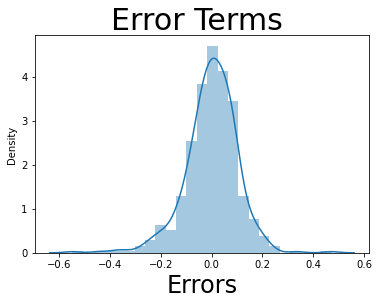

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 25)
fig.suptitle('Error Terms', fontsize = 30)                  # Plot heading 
plt.xlabel('Errors', fontsize = 24)                         # X-label

# Step 7: Making Predictions Using the Final Model

In [57]:
#Now scalling Test data on model

Num_Var=['atemp','hum','windspeed','cnt']

df_test[Num_Var] = scaler.fit_transform(df_test[Num_Var])

In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.459904,7.689600,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,3.957390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

We are good to use model for prediction

In [59]:
# x and y test sets creation

y_test = df_test.pop('cnt')

X_test = df_test

In [60]:
X_train_new=X_train_rfe8.drop(['const'], axis=1)

In [61]:
# X_test_new dataframe with variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
# Now making prediction on the newly created data set from Model 8
y_pred = lm8.predict(X_test_new)


### Calculate the R-squared score on the test set

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7955961097986249

In [64]:
from sklearn.metrics import mean_squared_error
# Square root of MSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.10767288514704769

# Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

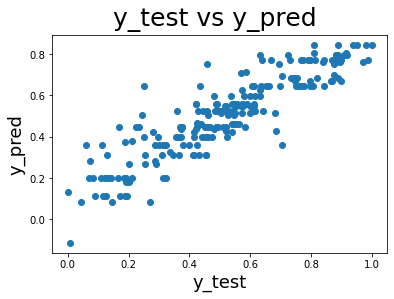

In [65]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=25)  
plt.xlabel('y_test', fontsize=18)   
plt.ylabel('y_pred', fontsize=18)

In [66]:
param = pd.DataFrame(lm8.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.399974
1,yr,0.247005
10,9,0.195753
9,8,0.156423
8,6,0.148505
11,7,0.125428
7,5,0.123588
12,10,0.113537
6,3,0.066497


We can see that the equation of our best fitted line is:

$ cnt = 0.399 + 0.247  \times  yr + 0.195  \times  9 + 0.156 \times 8 + 0.148 \times 6 + 0.125 \times 7 + 0.123 \times 5 + 0.113 \times 10 + 0.0664 \times 3 - 0.075 \times holiday - 0.088 \times Mist_cloudy - 0.198 \times spring- 0.315 \times Light rain_Light snow_Thunderstorm $


### All the positive coefficients like yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, 7, 10 indicate that an increase in these values will lead to an increase in the value of cnt.

Demands increases in the month of 3, 5, 6, 8 ,9, 7 , 10 and yr Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy

Recomendation for the company: High demand month of 3, 5 , 6, 8, 9 ,7 and 10